Spring simulation
Enter options (press Enter for defaults): load_csv
File path: test.csv


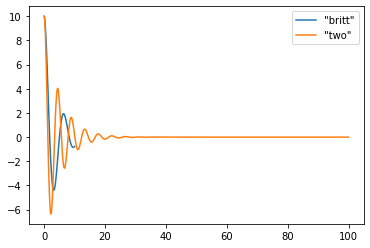

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import os

print("Spring simulation")

# Options:
# "fast" to enter every spring in CSV format
# "slow" to enter every spring one value at a time
# "load_csv" to load the spring data from a CSV file
# "duration" to set the duration for every simulation at once
# "dt" to set the dt for every simulation at once
# "simple" to set k=0
# "count" to set the number of springs rather than ask each time to add another

options = input("Enter options (press Enter for defaults): ").split(" ")

global_duration = None
global_dt = None
simple = False
count = None

if "duration" in options:
    global_duration = float(options[options.index("duration")+1])
if "dt" in options:
    global_dt = float(options[options.index("dt")+1])
if "simple" in options:
    simple = True
if "count" in options:
    count = int(options[options.index("count")+1])

def damped_spring_data(start_position, start_velocity, p, k, dt, total_time):
    time_range = list(range(1, math.floor(total_time/dt+0.01)+1))

    positions = [start_position]
    velocities = [start_velocity]

    for t in time_range:
        acceleration = -p * positions[-1] - k * velocities[-1]
        velocity = velocities[-1] + acceleration * dt
        position = positions[-1] + velocity * dt
        velocities.append(velocity)
        positions.append(position)

    time_values = [0.0] + [t * dt for t in time_range]
    
    return time_values, positions

def spring_data_from_csv(graph):
    name = graph[0]
    s0 = float(graph[1])
    v0 = float(graph[2])
    p = float(graph[3])
    if simple:
        k = 0
        i = 4
    else:
        k = float(graph[4])
        i = 5
    if global_duration is not None:
        tt = global_duration
    else:
        tt = float(graph[i])
        i = i + 1
    dt = global_dt if global_dt is not None else float(graph[i])
    time_values, positions = damped_spring_data(s0, v0, p, k, dt, tt)
    return name, time_values, positions


if "load_csv" in options:
    path = input("File path: ")
    try:
        with open(os.path.abspath(path)) as file:
            for line in file.readlines():
                graph = line.split(",")
                name, time_values, positions = spring_data_from_csv(graph)
                plt.plot(time_values, positions, label=name)
        plt.legend(loc="best")
        plt.show()
    except Exception as e:
        print("Error: could not read file {0}".format(os.path.abspath(path)))
        print(e)
elif count != 0:
    new_spring = True
    counter = 0
    while new_spring:
        fast_input = ("fast" in options) or (("slow" not in options) and input("Fast input? (Y/n): ") == "Y")
        if fast_input:
            graph = input("Enter all parameters on one line, separated by commas: ").split(",")
            name, time_values, positions = spring_data_from_csv(graph)
            plt.plot(time_values, positions, label=name)
        else:
            name = input("Spring name: ")
            s0 = float(input("Starting distance of the spring (in m): "))
            v0 = float(input("Starting velocity of the spring (in m/s): "))
            p = float(input("Spring constant p (in N/kg/m): "))
            k = 0 if simple else float(input("Damping coefficient k (in s^-1): "))
            tt = global_duration if global_duration is not None else float(input("Duration of simulation (in seconds): "))
            dt = global_dt if global_dt is not None else float(input("Time increment size (in seconds): "))
            time_values, positions = damped_spring_data(s0, v0, p, k, dt, tt)
            plt.plot(time_values, positions, label=name)
        if count is not None:
            counter += 1
            new_spring = (counter < count)
        else:
            new_spring = input("Add another spring? (Y/n): ") == "Y"
    plt.legend(loc="best")
    plt.show()



In [4]:
"1" + "1"


'11'